<a href="https://colab.research.google.com/github/mayurlohia7/hcl_hackathon/blob/main/HCL_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diversified_ecommerce_dataset.csv')
df.head()


,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


In [ ]:
df.isnull().sum()


,0
Product ID,0
Product Name,0
Category,0
Price,0
Discount,0
Tax Rate,0
Stock Level,0
Supplier ID,0
Customer Age Group,0
Customer Location,0


In [ ]:
df.shape


(1000000, 16)

In [ ]:
df.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [ ]:
df_sample = df.sample(n=5000, random_state=42)


In [ ]:
df_sample.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
987231,P5245,Magazines,Books,1522.61,5,10,308,S248,55+,"Toronto, Canada",Female,12.37,Overnight,15.24,No,79
79954,P2115,Dishwasher,Home Appliances,1853.07,20,5,117,S113,18-24,"Chicago, USA",Male,34.00,Standard,19.15,No,75
567130,P5690,Blender,Home Appliances,1089.70,15,12,368,S567,25-34,"Toronto, Canada",Non-Binary,22.95,Overnight,17.55,No,69
500891,P2516,Biographies,Books,708.86,0,10,220,S721,18-24,"Tokyo, Japan",Non-Binary,46.94,Express,7.69,No,73
55399,P7262,Speaker,Electronics,1010.11,25,5,455,S611,18-24,"Berlin, Germany",Male,24.42,Standard,12.58,Yes,73


In [ ]:
df_sample.shape

(5000, 16)

In [ ]:
df_sample.columns

Index(['Product ID', 'Product Name', 'Category', 'Price', 'Discount',
       'Tax Rate', 'Stock Level', 'Supplier ID', 'Customer Age Group',
       'Customer Location', 'Customer Gender', 'Shipping Cost',
       'Shipping Method', 'Return Rate', 'Seasonality', 'Popularity Index'],
      dtype='object')

In [ ]:
X = df_sample.drop('Return Rate', axis=1)
y = df_sample['Return Rate']



In [ ]:
#now starting with the preprocessing tasks:


In [ ]:
num_cols = ['Price','Discount','Tax Rate','Stock Level','Shipping Cost','Popularity Index']
cat_cols = ['Product Name','Category','Customer Age Group',
            'Customer Location','Customer Gender','Shipping Method','Seasonality']

for col in num_cols:
    X[col] = X[col].fillna(X[col].median())

for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

In [ ]:
for col in ['Price','Stock Level','Shipping Cost','Popularity Index']:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    X[col] = X[col].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('Return Rate', axis=1)
y = df_sample['Return Rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns

cat_corr = {}

for col in cat_cols:
    mean_map = y_train.groupby(X_train[col]).mean()
    temp = X_train[col].map(mean_map)
    cat_corr[col] = temp.corr(y_train)

pd.Series(cat_corr).sort_values(ascending=False)


,0
Product ID,0.902450
Supplier ID,0.465364
Product Name,0.099437
Customer Location,0.042729
Category,0.036315
Customer Age Group,0.031042
Shipping Method,0.025344
Customer Gender,0.011831
Seasonality,0.004417


In [ ]:
keep_cols = ['Product ID', 'Supplier ID']

drop_cols = [
    'Product Name','Customer Location','Category',
    'Seasonality','Customer Age Group',
    'Shipping Method','Customer Gender'
]

X.drop(columns=drop_cols, inplace=True)

for col in keep_cols:
    freq_map = X[col].value_counts(normalize=True)
    X[col + '_freq'] = X[col].map(freq_map)

X.drop(columns=keep_cols, inplace=True)

X.select_dtypes(include='object').columns


Index([], dtype='object')

In [ ]:
cat_cols = X.select_dtypes(include='object').columns

X = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True
)


In [ ]:
X.head()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Popularity Index,Product ID_freq,Supplier ID_freq
987231,1522.61,5,10,308,12.37,79,0.0006,0.0010
79954,1853.07,20,5,117,34.00,75,0.0010,0.0018
567130,1089.70,15,12,368,22.95,69,0.0006,0.0024
500891,708.86,0,10,220,46.94,73,0.0002,0.0010
55399,1010.11,25,5,455,24.42,73,0.0002,0.0008


In [ ]:
X_encoded = pd.get_dummies(
    X,
    columns=X.select_dtypes(include='object').columns,
    drop_first=True
)

X = X_encoded


In [ ]:
X.head()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Popularity Index,Product ID_freq,Supplier ID_freq
987231,1522.61,5,10,308,12.37,79,0.0006,0.0010
79954,1853.07,20,5,117,34.00,75,0.0010,0.0018
567130,1089.70,15,12,368,22.95,69,0.0006,0.0024
500891,708.86,0,10,220,46.94,73,0.0002,0.0010
55399,1010.11,25,5,455,24.42,73,0.0002,0.0008


In [ ]:
X.shape

(5000, 8)

In [ ]:
X.isnull().sum()

np.int64(0)

In [ ]:
X.dtypes

,0
Price,float64
Discount,int64
Tax Rate,int64
Stock Level,int64
Shipping Cost,float64
Popularity Index,int64
Product ID_freq,float64
Supplier ID_freq,float64


In [ ]:
y.describe()

,Return Rate
count,5000.000000
mean,10.397254
std,5.524402
min,1.000000
25%,5.557500
50%,10.355000
75%,15.150000
max,20.000000


<Axes: >

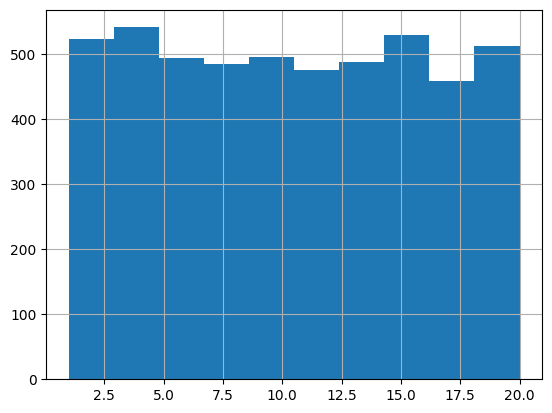

In [ ]:
y.hist()

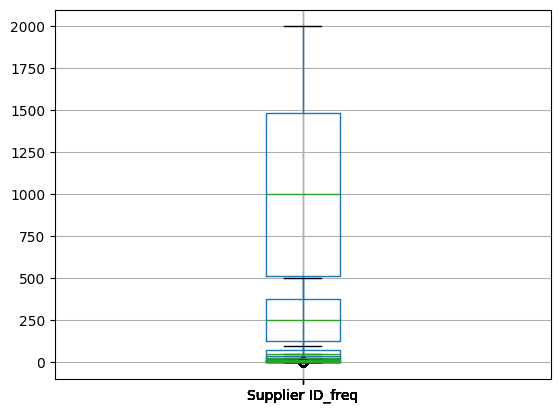

In [ ]:
for col in X.columns:
    X.boxplot(column=col)


<Axes: >

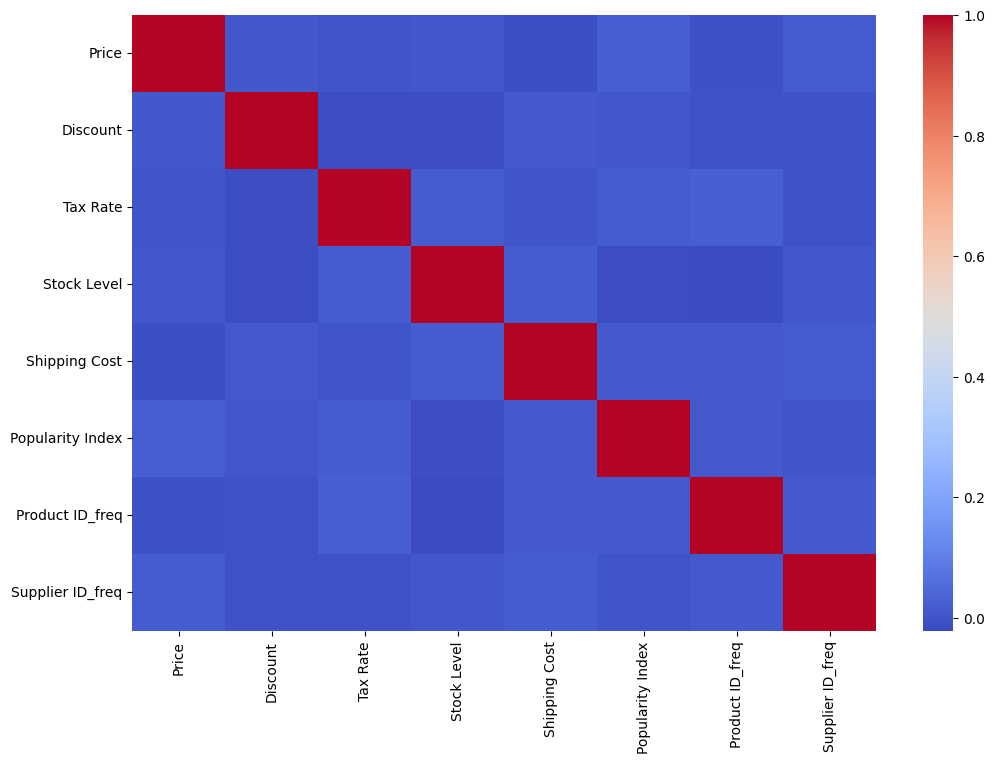

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap='coolwarm')


In [ ]:
X.corrwith(y).sort_values(ascending=False)


,0
Price,0.015705
Discount,0.006910
Shipping Cost,0.005867
Supplier ID_freq,0.004397
Product ID_freq,-0.000226
Tax Rate,-0.010297
Stock Level,-0.015159
Popularity Index,-0.023684


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train.shape

(4000, 8)

In [ ]:
X_test.shape

(1000, 8)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression
R2: 0.000619272048978603
MAE: 4.842130308521182
RMSE: 5.54238048612732


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Regressor")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Random Forest Regressor
R2: -0.031411094415887186
MAE: 4.8639169
RMSE: 5.630497255164503


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("Gradient Boosting Regressor")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Gradient Boosting Regressor
R2: -0.011022260680964235
MAE: 4.8566212243517715
RMSE: 5.574567914297438


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Regressor")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


XGBoost Regressor
R2: -0.07906558597386693
MAE: 4.952422940301895
RMSE: 5.759102031674214


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lgbm = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print("LightGBM Regressor")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 8
[LightGBM] [Info] Start training from score 10.382345
LightGBM Regressor
R2: -0.09243721904755486
MAE: 4.964494091520747
RMSE: 5.794675168750979


In [ ]:
y.describe()


,Return Rate
count,5000.000000
mean,10.397254
std,5.524402
min,1.000000
25%,5.557500
50%,10.355000
75%,15.150000
max,20.000000


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

y_pred_mean = np.full_like(y_test, y_train.mean())
r2_score(y_test, y_pred_mean)


-0.00018079038706808603

In [ ]:
#Now proceding with another approach:

In [ ]:
import pandas as pd

y_class = pd.qcut(
    y,
    q=[0, 0.33, 0.66, 1.0],
    labels=[0, 1, 2]
)

y_class = y_class.astype(int)


In [ ]:
y_class.value_counts(normalize=True)


,proportion
Return Rate,
2,0.3398
1,0.3302
0,0.3300


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_clf = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

log_clf.fit(X_train_scaled, y_train)
y_pred = log_clf.predict(X_test_scaled)

print("Logistic Regression (Multiclass)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression (Multiclass)
Accuracy: 0.352
[[100  79 151]
 [ 94  81 155]
 [ 90  79 171]]
              precision    recall  f1-score   support

           0       0.35      0.30      0.33       330
           1       0.34      0.25      0.28       330
           2       0.36      0.50      0.42       340

    accuracy                           0.35      1000
   macro avg       0.35      0.35      0.34      1000
weighted avg       0.35      0.35      0.34      1000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier
Accuracy: 0.33
[[ 99 118 113]
 [122 106 102]
 [101 114 125]]
              precision    recall  f1-score   support

           0       0.31      0.30      0.30       330
           1       0.31      0.32      0.32       330
           2       0.37      0.37      0.37       340

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gbr_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

gbr_clf.fit(X_train, y_train)
y_pred = gbr_clf.predict(X_test)

print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier
Accuracy: 0.335
[[ 98 129 103]
 [103 123 104]
 [107 119 114]]
              precision    recall  f1-score   support

           0       0.32      0.30      0.31       330
           1       0.33      0.37      0.35       330
           2       0.36      0.34      0.34       340

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.34      0.34      0.33      1000



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Classifier
Accuracy: 0.33
[[103 121 106]
 [ 99 104 127]
 [ 92 125 123]]
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       330
           1       0.30      0.32      0.31       330
           2       0.35      0.36      0.35       340

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



In [ ]:
#now we are finally trying out binary classification:

In [ ]:
high_thr = y.quantile(0.75)   # top 25% = high risk
y_bin = (y >= high_thr).astype(int)
y_bin.value_counts(normalize=True)


,proportion
Return Rate,
0,0.7496
1,0.2504


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin,
    test_size=0.2,
    random_state=42,
    stratify=y_bin
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(max_features=0.70,
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest (Binary)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest (Binary)
Accuracy: 0.746
[[739  11]
 [243   7]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       750
           1       0.39      0.03      0.05       250

    accuracy                           0.75      1000
   macro avg       0.57      0.51      0.45      1000
weighted avg       0.66      0.75      0.65      1000



In [ ]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


,proportion
Return Rate,
0,0.75
1,0.25


In [ ]:
#Hyperparameter tunning of random forest:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

grid_rf = GridSearchCV(
    rf,
    param_grid,
    scoring='f1',     # focus on minority class
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500]},
             scoring='f1', verbose=1)

In [ ]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.674

In [ ]:
df.columns

Index(['Product ID', 'Product Name', 'Category', 'Price', 'Discount',
       'Tax Rate', 'Stock Level', 'Supplier ID', 'Customer Age Group',
       'Customer Location', 'Customer Gender', 'Shipping Cost',
       'Shipping Method', 'Return Rate', 'Seasonality', 'Popularity Index'],
      dtype='object')

In [ ]:
import pickle

with open("rf_return_risk_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)
